### Bootstrap

#### Packages

In [1]:
import pandas as pkg_pandas
import math as pkg_math
from matplotlib import pyplot as pkg_plot
from sklearn import model_selection as pkg_model_selection
from sklearn import preprocessing as pkg_preprocessing
from sklearn import tree as pkg_tree
from sklearn import metrics as pkg_metrics
from sklearn import datasets as pkg_datasets
from sklearn import ensemble as pkg_ensemble
import seaborn as pkg_seaborn

#### Load Data

In [2]:
loaded_data = pkg_datasets.load_digits()
dir(loaded_data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
print("\nFeature Names = {}\nTarget Names = {}\nColumn".format(\
    loaded_data.feature_names, loaded_data.target_names))


Feature Names = ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
Target Names = [0 1 2 3 4 5 6 7 8 9]
Column


In [4]:
loaded_df = pkg_pandas.DataFrame(loaded_data.data, columns=loaded_data.feature_names)
loaded_df['target'] = loaded_data.target
loaded_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Analysis

#### Pre-Work

In [5]:
# Initialize
baseline_df = loaded_df

In [6]:
output_column_name = 'target'
baseline_outputs = baseline_df[output_column_name]
baseline_inputs = baseline_df.drop(columns=[output_column_name])

train_inputs, test_inputs, train_outputs, test_outputs  = \
    pkg_model_selection.train_test_split(baseline_inputs, baseline_outputs, test_size=0.20)

print("=== Baseline Split - Train and Test ===")
print("Lengths: Baseline = {}, Train = {}, Test = {}".format(len(baseline_inputs), len(train_inputs), len(test_inputs)))

=== Baseline Split - Train and Test ===
Lengths: Baseline = 1797, Train = 1437, Test = 360


#### Model: Train (Fit)

In [7]:
best_model = None
best_params = []
best_test_score = 0
best_predicted_outputs = None

for criteria_type in ['gini','entropy','log_loss']:
    for feature_type in ['sqrt', 'log2']:
        for class_weight_type in ['balanced', 'balanced_subsample']:
            for estimator_count in [20, 40, 70, 100, 150, 250]:
                # Parameter Combination
                params = [criteria_type, feature_type, class_weight_type, str(estimator_count)]
                param_name = '_'.join(params)

                # Train
                model = pkg_ensemble.RandomForestClassifier(n_estimators=estimator_count, criterion=criteria_type, max_features=feature_type, class_weight=class_weight_type)
                model.fit(train_inputs, train_outputs)

                # Test
                predicted_outputs = model.predict(test_inputs)

                # Score
                baseline_score = model.score(baseline_inputs, baseline_outputs)
                train_score = model.score(train_inputs, train_outputs)
                test_score = model.score(test_inputs, test_outputs)
                print("DEBUG:: Scores({}): Baseline = {}, Train = {}, Test = {}".format(param_name, baseline_score, train_score, test_score))

                if (best_test_score < test_score):
                    best_model = model
                    best_params = params
                    best_test_score = test_score
                    best_predicted_outputs = predicted_outputs

DEBUG:: Scores(gini_sqrt_balanced_20): Baseline = 0.9910962715637173, Train = 1.0, Test = 0.9555555555555556
DEBUG:: Scores(gini_sqrt_balanced_40): Baseline = 0.9938786867000556, Train = 1.0, Test = 0.9694444444444444
DEBUG:: Scores(gini_sqrt_balanced_70): Baseline = 0.994991652754591, Train = 1.0, Test = 0.975
DEBUG:: Scores(gini_sqrt_balanced_100): Baseline = 0.994991652754591, Train = 1.0, Test = 0.975
DEBUG:: Scores(gini_sqrt_balanced_150): Baseline = 0.996661101836394, Train = 1.0, Test = 0.9833333333333333
DEBUG:: Scores(gini_sqrt_balanced_250): Baseline = 0.9955481357818586, Train = 1.0, Test = 0.9777777777777777
DEBUG:: Scores(gini_sqrt_balanced_subsample_20): Baseline = 0.9910962715637173, Train = 1.0, Test = 0.9555555555555556
DEBUG:: Scores(gini_sqrt_balanced_subsample_40): Baseline = 0.9927657206455203, Train = 1.0, Test = 0.9638888888888889
DEBUG:: Scores(gini_sqrt_balanced_subsample_70): Baseline = 0.994991652754591, Train = 1.0, Test = 0.975
DEBUG:: Scores(gini_sqrt_bala

In [8]:
print("= = : Best Model : = =")
print("Params = {}, Test Score = {}".format(best_params, best_test_score))

= = : Best Model : = =
Params = ['gini', 'sqrt', 'balanced', '150'], Test Score = 0.9833333333333333


#### Confusion Matrix

In [9]:
cm = pkg_metrics.confusion_matrix(y_true=test_outputs, y_pred=best_predicted_outputs)
cm

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1, 25,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 41]])

<AxesSubplot:>

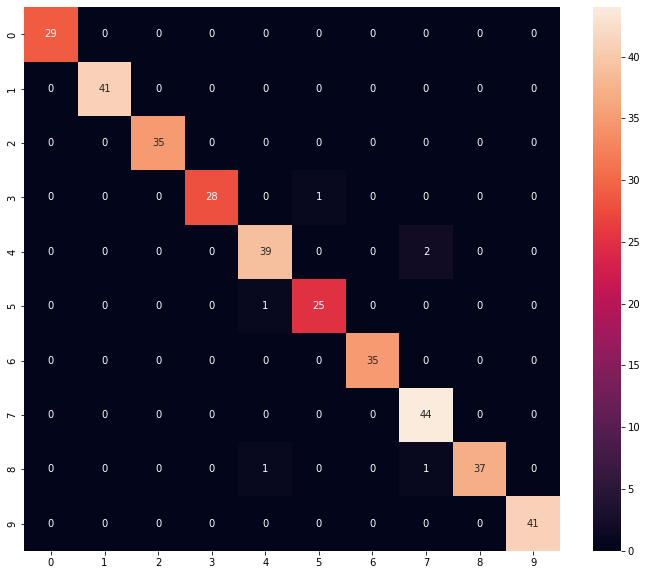

In [11]:
%matplotlib inline
pkg_plot.figure(figsize=(12,10))
pkg_plot.xlabel('Predicted')
pkg_plot.xlabel('Actual')
pkg_seaborn.heatmap(cm, annot=True)